In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
data=pd.read_csv("car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [4]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [5]:
data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [6]:
data["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [7]:
data["Selling_type"].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [8]:
data["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

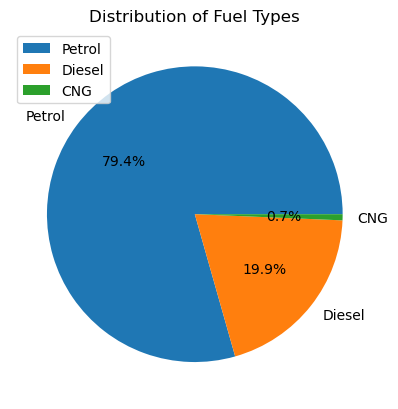

In [9]:
fuel_type_counts = data["Fuel_Type"].value_counts()
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%')
plt.legend(loc="upper left")
plt.title("Distribution of Fuel Types")
plt.show()

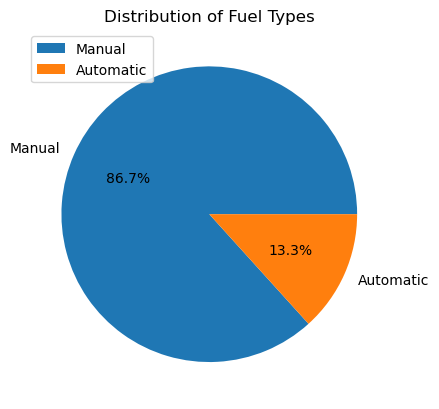

In [10]:
transmission_type_counts = data["Transmission"].value_counts()
plt.pie(transmission_type_counts, labels=transmission_type_counts.index, autopct='%1.1f%%')
plt.legend(loc="upper left")
plt.title("Distribution of Fuel Types")
plt.show()

In [11]:
pd.get_dummies(data[["Fuel_Type","Transmission","Owner"]],drop_first=True)

,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,0,0,1,1
1,0,1,0,1
2,0,0,1,1
3,0,0,1,1
4,0,1,0,1
...,...,...,...,...
296,0,1,0,1
297,0,0,1,1
298,0,0,1,1
299,0,1,0,1


In [12]:
label_encoder = LabelEncoder()
data["Selling_type"] = label_encoder.fit_transform(data["Selling_type"])

In [13]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,0,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,0,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,0,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,0,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,0,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,0,Manual,0


In [14]:
data.drop(["Car_Name","Fuel_Type","Transmission"],axis=1,inplace=True)

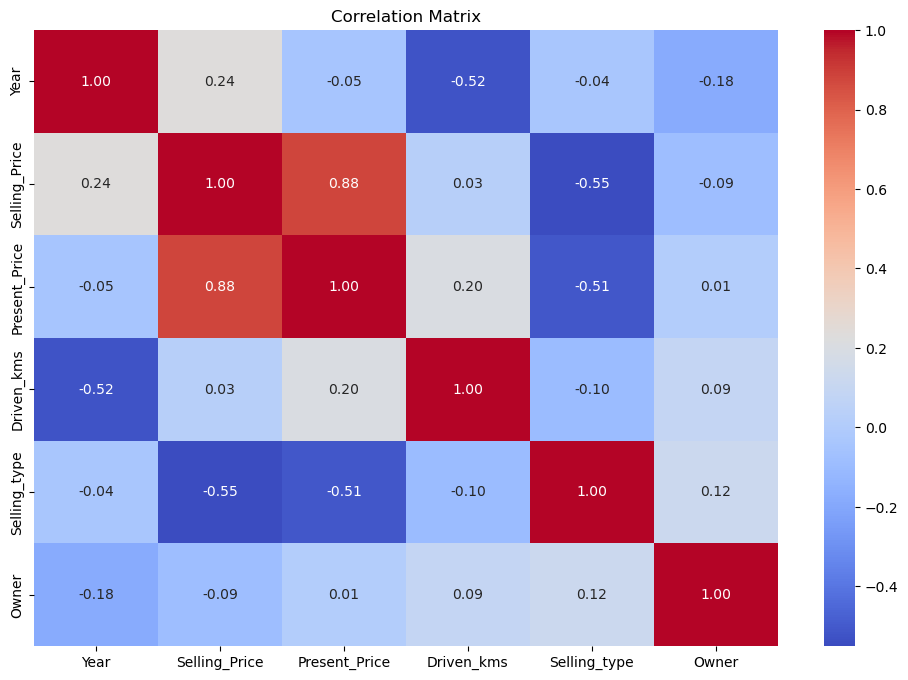

In [15]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

C:\Users\SWATHY KRISHNA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


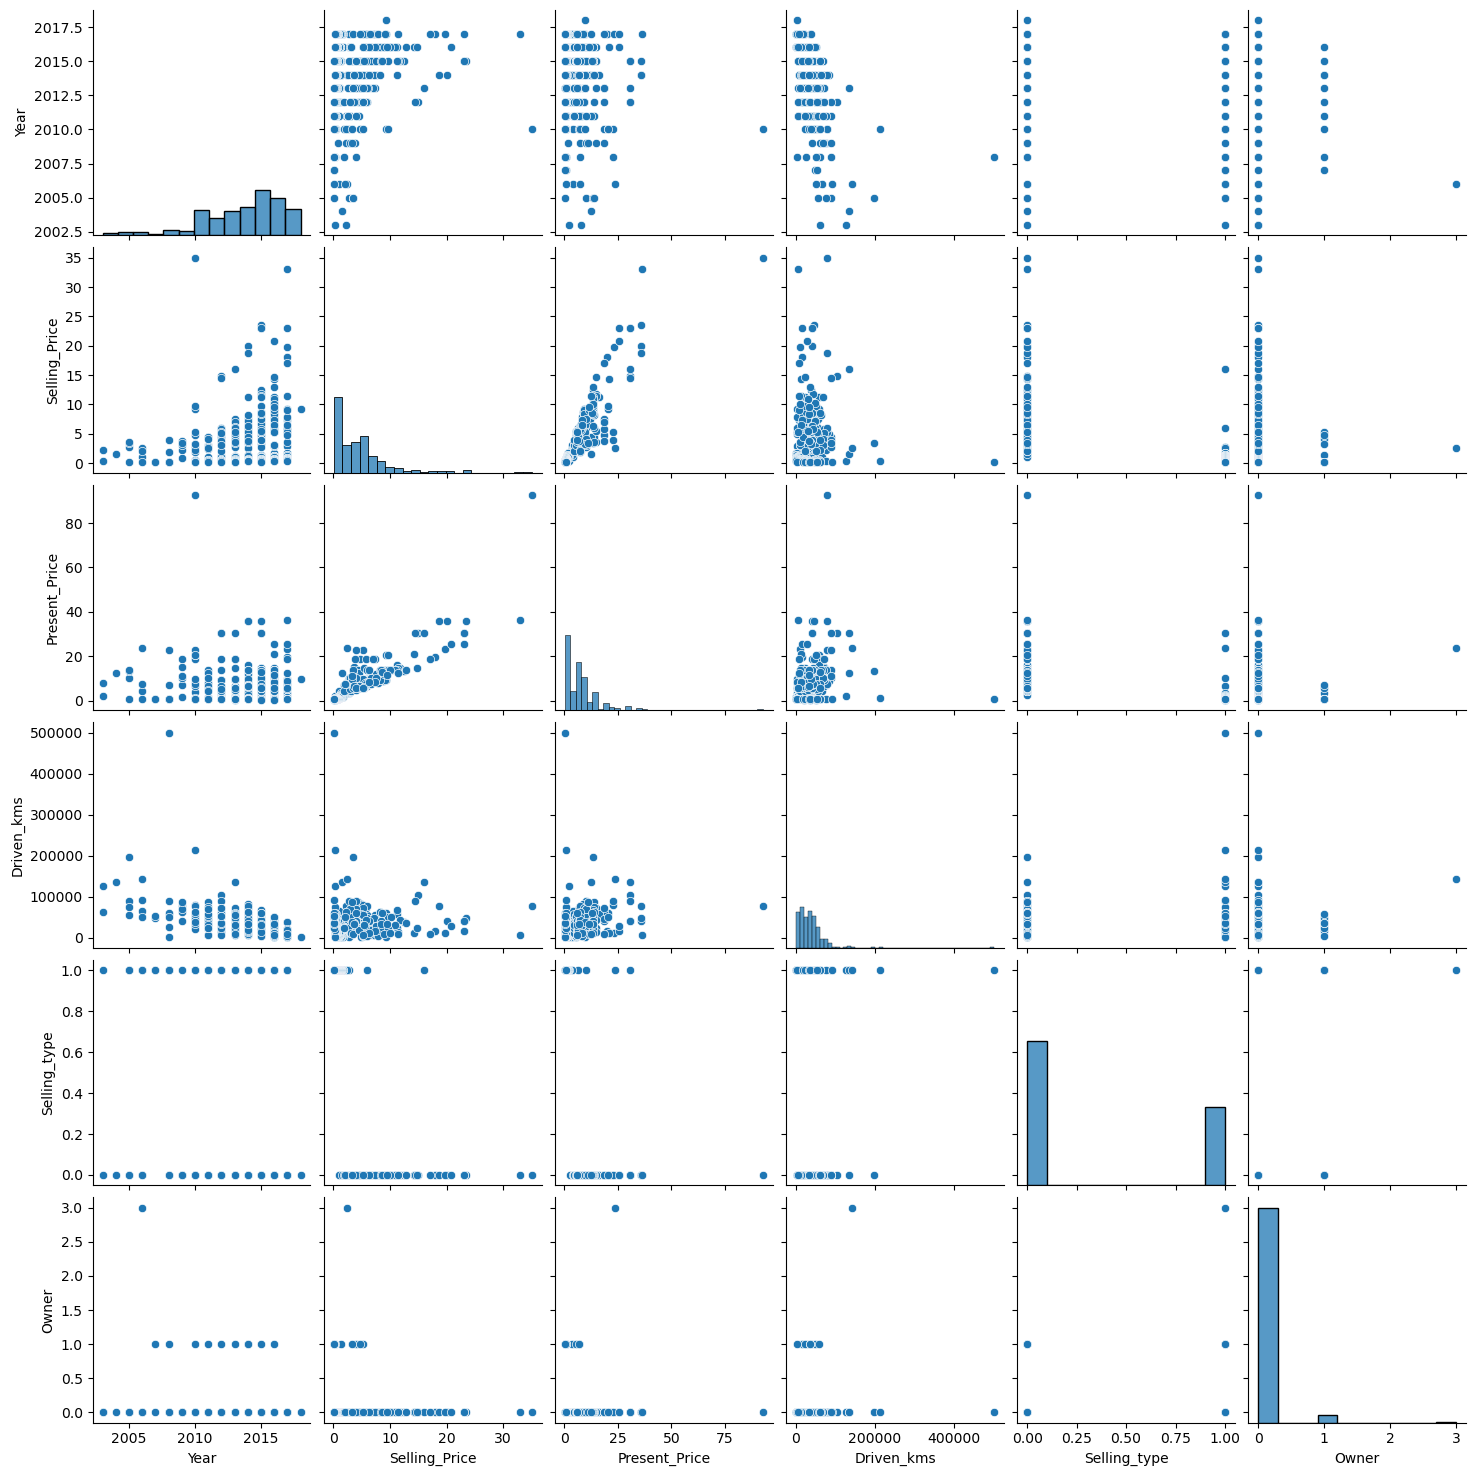

In [16]:
sns.pairplot(data)
plt.show()

In [17]:
x = data.drop("Selling_Price", axis=1)
y = data["Selling_Price"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
data.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Selling_type       int32
Owner              int64
dtype: object

In [20]:
data

,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Owner
0,2014,3.35,5.59,27000,0,0
1,2013,4.75,9.54,43000,0,0
2,2017,7.25,9.85,6900,0,0
3,2011,2.85,4.15,5200,0,0
4,2014,4.60,6.87,42450,0,0
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0
297,2015,4.00,5.90,60000,0,0
298,2009,3.35,11.00,87934,0,0
299,2017,11.50,12.50,9000,0,0


In [21]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
lr= LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [23]:
y_train_pred = lr.predict(x_train_scaled)
y_test_pred = lr.predict(x_test_scaled)

In [24]:
print("Training Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))

Training Performance:
Mean Absolute Error: 1.1727008728300035
Mean Squared Error: 3.5350580473857116
R2 Score: 0.8662839789654401


In [25]:
print("\nTesting Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))


Testing Performance:
Mean Absolute Error: 1.282603185906884
Mean Squared Error: 4.003751584314812
R2 Score: 0.8261927505773418


In [26]:
cv_scores = cross_val_score(lr, x_train_scaled, y_train, cv=10, scoring='r2')
print("\nCross-validation R2 scores:\n", cv_scores)
print("Mean Cross-validation R2 score:", np.mean(cv_scores))


Cross-validation R2 scores:
 [0.88710276 0.75850006 0.73305066 0.89799512 0.7736471  0.7773521
 0.82672593 0.49029215 0.85910058 0.89794348]
Mean Cross-validation R2 score: 0.7901709949228932


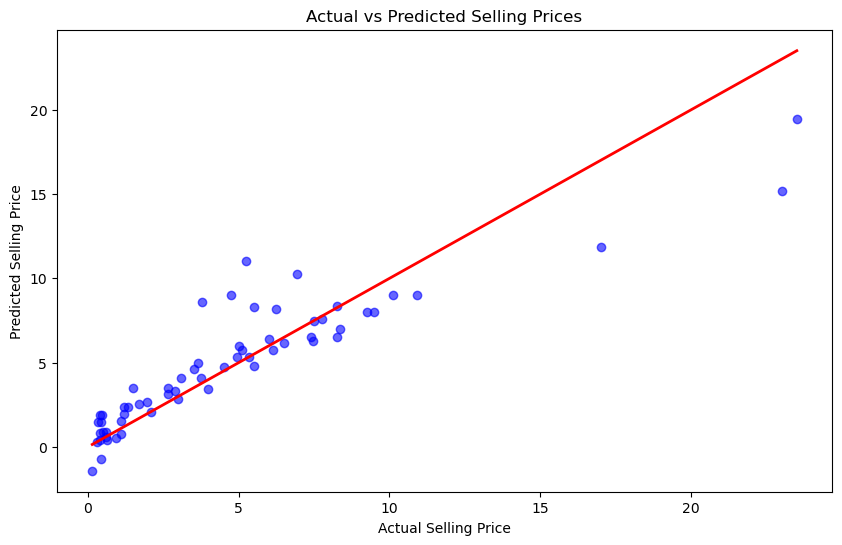

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Prices')
plt.show()